In [ ]:
'''
Angie Sofia Hernández Tristán	          2008178
Juan Carlos Serrano Acosta	            2001047
Jorge Fabián Moreno Sarmiento 	        2015221
Mauricio Armando Villatoro Alvarado     2128154
Jesús Sauceda Rivera 	                  2014186
Hora clase: N1, LMV
'''

In [2]:
#1. Instalar librerias
!pip install kaggle
!pip install tensorflow

In [6]:
#2. Configurar Kaggle y descargar el dataset
import os
os.environ['KAGGLE_CONF_DIR'] = "/content/"

In [7]:
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
 98% 377M/385M [00:08<00:00, 35.2MB/s]
100% 385M/385M [00:08<00:00, 47.8MB/s]


In [ ]:
!unzip /content/cards-image-datasetclassification.zip -d /content/

In [13]:
#Verificar la estructura del directorio y ajustar su nombre
print("Contenido de /content/:")
print(os.listdir('/content/'))

Contenido de /content/:
['.config', 'cards-image-datasetclassification.zip', 'valid', 'cards.csv', 'test', '14card types-14-(200 X 200)-94.61.h5', 'train', '53cards-53-(200 X 200)-100.00.h5', 'sample_data']


In [15]:
import os
print("Contenido de /content/:")
print(os.listdir('/content/'))
train_dir = '/content/train'
valid_dir = '/content/valid'

Contenido de /content/:
['.config', 'cards-image-datasetclassification.zip', 'valid', 'cards.csv', 'test', '14card types-14-(200 X 200)-94.61.h5', 'train', '53cards-53-(200 X 200)-100.00.h5', 'sample_data']


In [21]:
#3. Preprocesamiento de las imagenes
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [22]:
batch_size = 32
img_height = 150
img_width = 150

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% de los datos se utilizarán para la validación
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Usar este generador para el conjunto de entrenamiento
)

validation_generator = train_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Usar este generador para el conjunto de validación
)

Found 6121 images belonging to 53 classes.
Found 53 images belonging to 53 classes.


In [24]:
#4. Definir y entrenar la CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
192/192 [==============================] - 403s 2s/step - loss: 2.8474 - accuracy: 0.2709 - val_loss: 1.0845 - val_accuracy: 0.6792
Epoch 2/10
192/192 [==============================] - 392s 2s/step - loss: 1.6261 - accuracy: 0.5627 - val_loss: 0.5538 - val_accuracy: 0.7925
Epoch 3/10
192/192 [==============================] - 404s 2s/step - loss: 0.8645 - accuracy: 0.7616 - val_loss: 0.6234 - val_accuracy: 0.8679
Epoch 4/10
192/192 [==============================] - 403s 2s/step - loss: 0.3590 - accuracy: 0.9044 - val_loss: 0.6401 - val_accuracy: 0.8113
Epoch 5/10
192/192 [==============================] - 391s 2s/step - loss: 0.2007 - accuracy: 0.9562 - val_loss: 0.4569 - val_accuracy: 0.8679
Epoch 6/10
192/192 [==============================] - 397s 2s/step - loss: 0.1107 - accuracy: 0.9770 - val_loss: 0.4922 - val_accuracy: 0.8868
Epoch 7/10
192/192 [==============================] - 393s 2s/step - loss: 0.0641 - accuracy: 0.9876 - val_loss: 0.6579 - val_accuracy: 0.8868

In [26]:
#5. 5 predicciondes y gráfica
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_and_show(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    plt.imshow(img)
    plt.title(f'Prediction: {list(train_generator.class_indices.keys())[predicted_class[0]]}')
    plt.show()

1/1 [==============================] - 0s 44ms/step


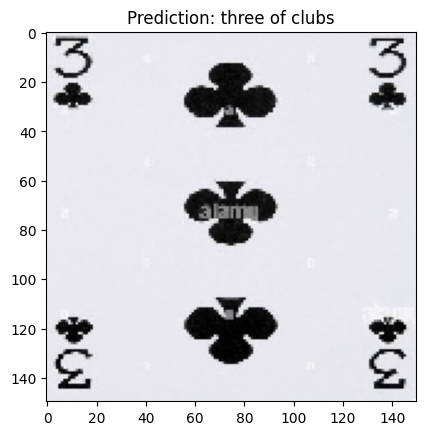

1/1 [==============================] - 0s 73ms/step


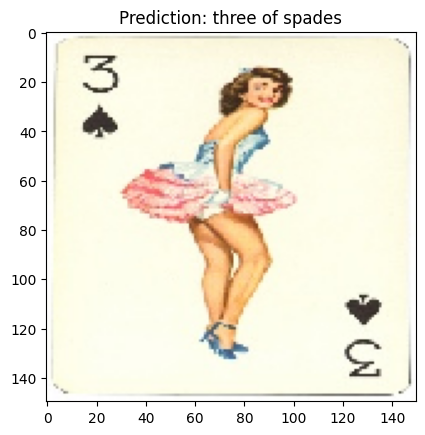

1/1 [==============================] - 0s 57ms/step


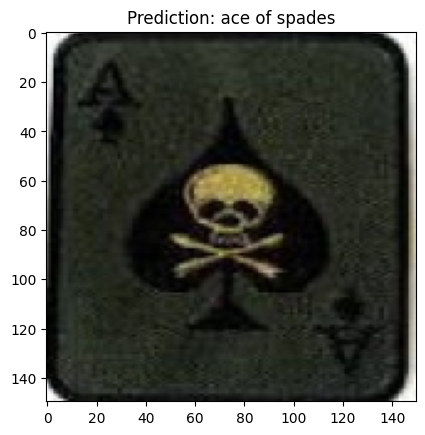

1/1 [==============================] - 0s 57ms/step


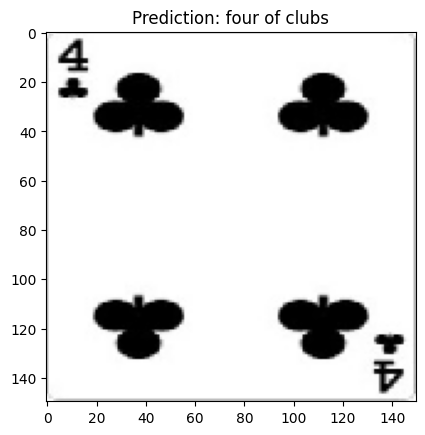

1/1 [==============================] - 0s 64ms/step


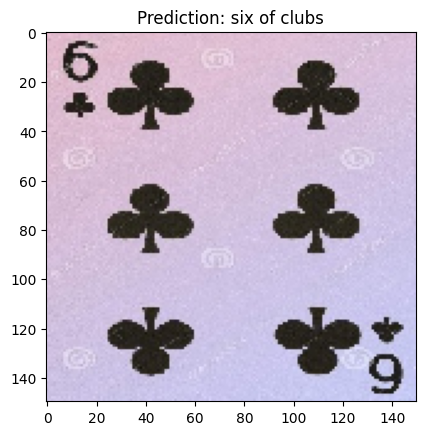

In [34]:
import random

test_image_paths = []
for class_dir in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_dir)
    if os.path.isdir(class_path):
        test_image_paths.extend([os.path.join(class_path, img) for img in os.listdir(class_path)[:5]])

for img_path in random.sample(test_image_paths, 5):
    predict_and_show(img_path)

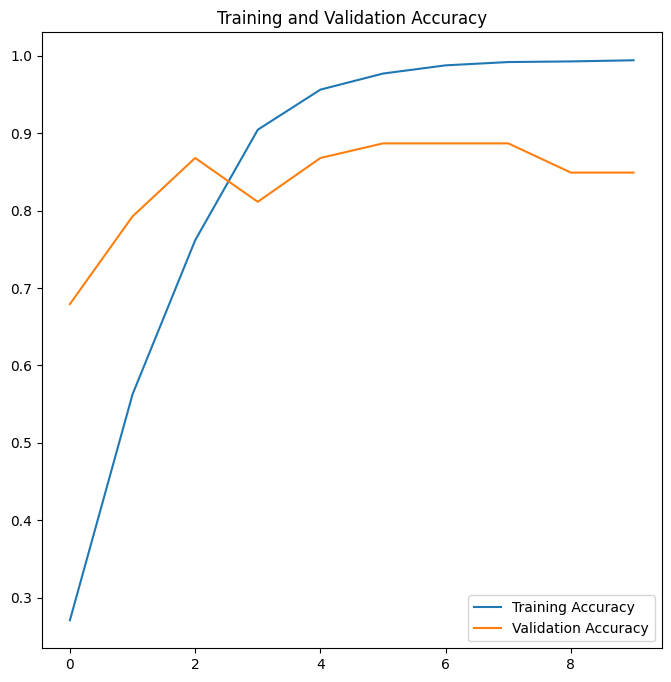

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()